<font size="4" color="purple"> TALLER DE METODOS ESTOCÁSTICOS - EJERCICIO 3 - VALORES EXTREMOS.


*   ALUMNO: EDWIN GILBERTO AMAYA REYES
*   PROFESOR LEONARDO DAVID DONADO GARZÓN

<font size="4" >  GENERALIDADES

Considere los siguientes datos de caudal máximo diario anual del río Mosa en la estación de Eysden en la frontera entre los Países Bajos y Bélgica (descarga promedio diaria en m3/s).


| Año  | Caudal Máximo Diario Anual (m³/s) | Año  | Caudal Máximo Diario Anual (m³/s) | Año  | Caudal Máximo Diario Anual (m³/s) | Año  | Caudal Máximo Diario Anual (m³/s) |
|------|----------------------------------|------|----------------------------------|------|----------------------------------|------|----------------------------------|
| 1950 | 1266                             | 1963 | 1537                             | 1976 | 597                              | 1989 | 1149                             |
| 1951 | 1492                             | 1964 | 1155                             | 1977 | 1216                             | 1990 | 1444                             |
| 1952 | 1862                             | 1965 | 1899                             | 1978 | 1061                             | 1991 | 1791                             |
| 1953 | 861                              | 1966 | 855                              | 1979 | 1450                             | 1992 | 1207                             |
| 1954 | 715                              | 1967 | 1596                             | 1980 | 2016                             | 1993 | 3050                             |
| 1955 | 1367                             | 1968 | 1380                             | 1981 | 1270                             | 1994 | 1578                             |
| 1956 | 1837                             | 1969 | 745                              | 1982 | 1341                             | 1995 | 2817                             |
| 1957 | 1429                             | 1970 | 2181                             | 1983 | 1075                             | 1996 | 792                              |
| 1958 | 1429                             | 1971 | 955                              | 1984 | 2482                             | 1997 | 1143                             |
| 1959 | 1261                             | 1972 | 907                              | 1985 | 874                              | 1998 | 1698                             |
| 1960 | 1607                             | 1973 | 824                              | 1986 | 1689                             | 1999 | 2076                             |
| 1961 | 2132                             | 1974 | 1271                             | 1987 | 1554                             | 2000 | 1204                             |
| 1962 | 1652                             | 1975 | 1044                             | 1988 | 1831                             | 2001 | 1835                             |


<font size="3"> 1. Pruebe si estos valores pueden ser modelados como variables estocásticas independientes.

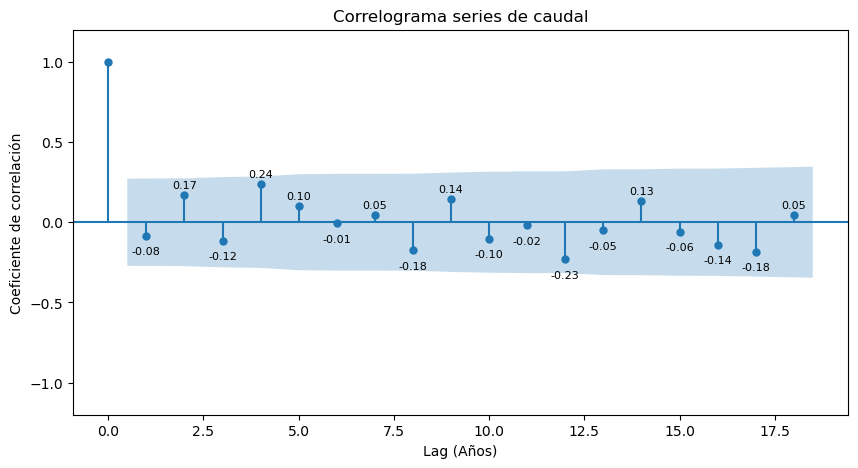

bajo un intervalo de confianza del 95% todos los resultados de autocorrelación se encuentran inmersos, por tanto esta no es estadisticamente significativa y es muy probable que estos valores sean producto del azar y no por dependencia de datos


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Crear DataFrame
data = {
    'Año': list(range(1950, 2002)),
    'Caudal Máximo Diario Anual (m3/s)': [
        1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537,
        1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216,
        1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791,
        1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835
    ]
}
df = pd.DataFrame(data)

# Crear correlograma
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['Caudal Máximo Diario Anual (m3/s)'], ax=ax)

# Personalizar títulos
ax.set_title('Correlograma series de caudal')
ax.set_xlabel('Lag (Años)')
ax.set_ylabel('Coeficiente de correlación')

# Ajustar el intervalo del eje Y
ax.set_ylim(-1.2, 1.2)


# Definir offsets
offset_pos = 0.06  # Ajusta este valor para cambiar el offset de las etiquetas en el eje positivo
offset_neg = -0.10  # Ajusta este valor para cambiar el offset de las etiquetas en el eje negativo

# Mostrar valores de los puntos en el eje Y
for i, y in enumerate(ax.lines[1].get_ydata()):
    if i == 0:  # Ignorar el primer punto porque siempre es 1
        continue
    offset = offset_pos if y >= 0 else offset_neg
    ax.text(i, y + offset, f'{y:.2f}', va='center', ha='center', fontsize=8)

plt.show()

print ("bajo un intervalo de confianza del 95% todos los resultados de autocorrelación se encuentran inmersos, por tanto esta no es estadisticamente significativa y es muy probable que estos valores sean producto del azar y no por dependencia de datos")





In [38]:
import pandas as pd
import numpy as np
from IPython.display import display, Math



df = pd.DataFrame(data)

# Ordenando el DataFrame por año
df = df.sort_values(by='Año')

# Calculando el promedio de Caudal Máximo Diario Anual
x_promedio = df['Caudal Máximo Diario Anual (m3/s)'].mean()

# Calculando la primera parte de la ecuación
suma_1 = sum([(df['Caudal Máximo Diario Anual (m3/s)'][i] - df['Caudal Máximo Diario Anual (m3/s)'][i+1])**2 for i in range(len(df)-1)])

# Calculando la segunda parte de la ecuación
suma_2 = sum([(xi - x_promedio)**2 for xi in df['Caudal Máximo Diario Anual (m3/s)']])

# Calculando vN 
vN = suma_1 / suma_2

# Imprimiendo la ecuación de von Neumann en LaTeX
display(Math(r'vN = \frac{\sum_{t=1}^{n-1} (x_t - x_{t+1})^2}{\sum_{t=1}^n (x_t - \bar{x})^2}'))

# Imprimiendo el valor de vN
print("El valor de vN es:", vN)

print ("el valor critico en la tabla suministrado por el profesor para 52 datos con un alpha de 0.05 es 1.5518, siendo menor  que 2 por tanto, los datos son independientes")



<IPython.core.display.Math object>

El valor de vN es: 2.1541108274866954
el valor critico en la tabla suministrado por el profesor para 52 datos con un alpha de 0.05 es 1.5518, siendo menor  que 2 por tanto, los datos son independientes


<font size="3" > 2. Pruebe si se puede detectar una tendencia.

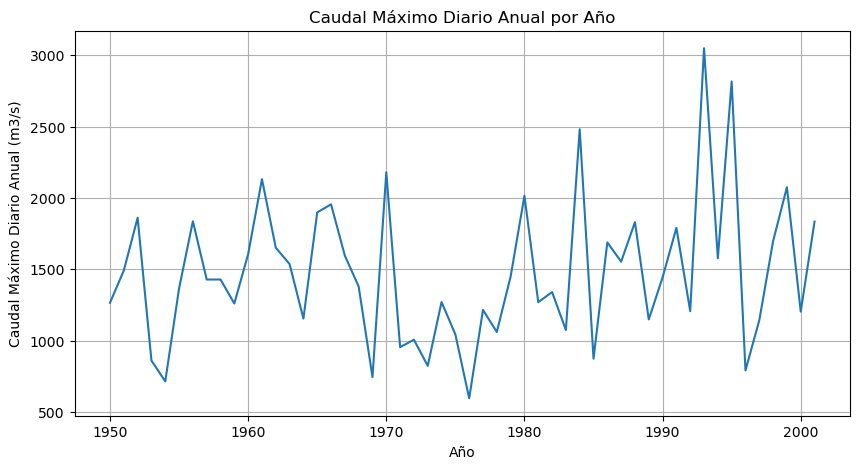

Mann-Kendall Trend Test
Trend: no trend
p-value: 0.4028848483787124
Z-score: 0.8364801336621311
Tau: 0.08069381598793364


In [39]:

import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk


# llamar dataframe
df = pd.DataFrame(data)

# Graficar los datos
plt.figure(figsize=(10, 5))
plt.plot(data['Año'], data['Caudal Máximo Diario Anual (m3/s)'])
plt.xlabel('Año')
plt.ylabel('Caudal Máximo Diario Anual (m3/s)')
plt.title('Caudal Máximo Diario Anual por Año')
plt.grid(True)
plt.show()

# Realizar la prueba de tendencia de Mann-Kendall
result = mk.original_test(data['Caudal Máximo Diario Anual (m3/s)'])

print('Mann-Kendall Trend Test')
print(f'Trend: {result.trend}')
print(f'p-value: {result.p}')
print(f'Z-score: {result.z}')
print(f'Tau: {result.Tau}')


<font size="3" > 3. Grafique los datos en papel de probabilidad Gumbel y determina los parámetros de la distribución Gumbel. ¿Cuál es la estimación de la inundación de 1000 años?

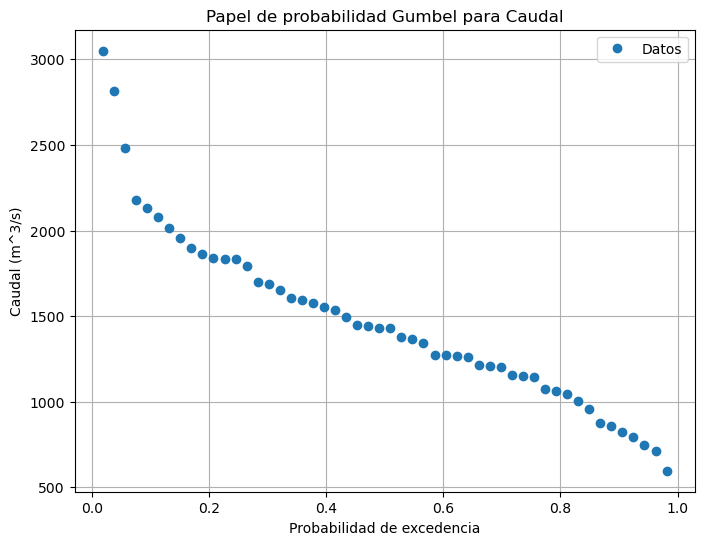

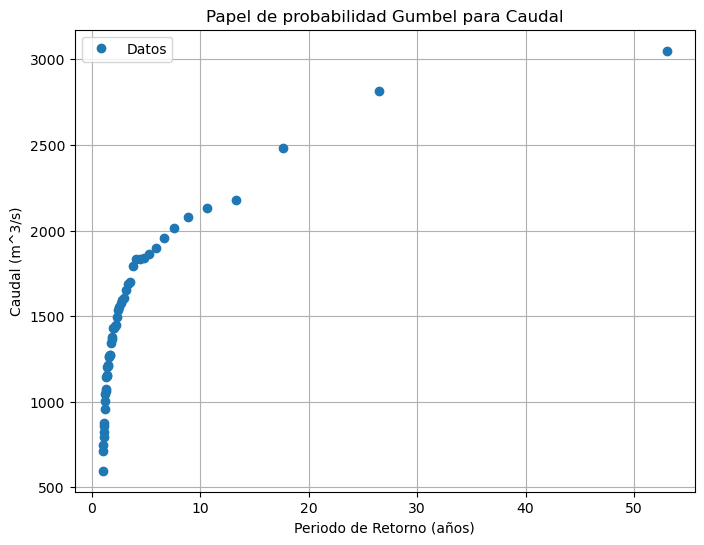

Parámetros de la distribución Gumbel ajustada:
Mu: 1240.3927541324572
Beta: 414.6919824889627
El caudal estimado para un periodo de retorno de 1000 años es: 4104.776052884877 m^3/s


In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
años = np.arange(1950, 2002)
caudales = np.array([1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00, 1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00, 1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00, 1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00, 1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00, 1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00, 1698.00, 2076.00, 1204.00, 1835.00])

# Ordenar los datos de mayor a menor
caudales_ordenados = np.sort(caudales)

# Calcular el rango y el número de datos
rango = np.max(caudales_ordenados) - np.min(caudales_ordenados)
n = len(caudales_ordenados)

# Calcular la probabilidad de excedencia (1 - F(x))
prob_excedencia = 1 - np.arange(1, n+1) / (n+1)

# Ajustar los parámetros de la distribución Gumbel usando el método de máxima verosimilitud
parametros = stats.gumbel_r.fit(caudales_ordenados)

# Calcular los valores teóricos de la distribución Gumbel
valores_teoricos = stats.gumbel_r.ppf(prob_excedencia, *parametros)

# Crear el gráfico de probabilidad de excedencia vs caudal
plt.figure(figsize=(8,6))
plt.plot(prob_excedencia, caudales_ordenados, 'o', label='Datos')
plt.xlabel('Probabilidad de excedencia')
plt.ylabel('Caudal (m^3/s)')
plt.title('Papel de probabilidad Gumbel para Caudal')
plt.grid(True)
plt.legend()
plt.show()

# Calcular el periodo de retorno en años (inverso de la probabilidad de excedencia)
periodo_retorno = 1 / (1 - np.arange(1, n+1) / (n+1))

# Crear el gráfico de papel de probabilidad Gumbel para el caudal
plt.figure(figsize=(8,6))
plt.plot(periodo_retorno, caudales_ordenados, 'o', label='Datos')
plt.xlabel('Periodo de Retorno (años)')
plt.ylabel('Caudal (m^3/s)')
plt.title('Papel de probabilidad Gumbel para Caudal')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar los parámetros de la distribución Gumbel ajustada
print("Parámetros de la distribución Gumbel ajustada:")
print("Mu:", parametros[0])
print("Beta:", parametros[1])

# Definir el periodo de retorno deseado
periodo_retorno_deseado = 1000

# Calcular el caudal para el periodo de retorno deseado utilizando la función inversa de la distribución Gumbel
caudal_estimado = stats.gumbel_r.ppf(1 - 1/periodo_retorno_deseado, *parametros)

print("El caudal estimado para un periodo de retorno de", periodo_retorno_deseado, "años es:", caudal_estimado, "m^3/s")



<font size="3" > 4. Determine los parámetros de la distribución Gumbel mediante regresión lineal de Qmax contra -ln(-ln(i/n+1)) con i siendo el rango del máximo más pequeño. Estima la inundación de 1000 años y sus límites de confianza del 95%.

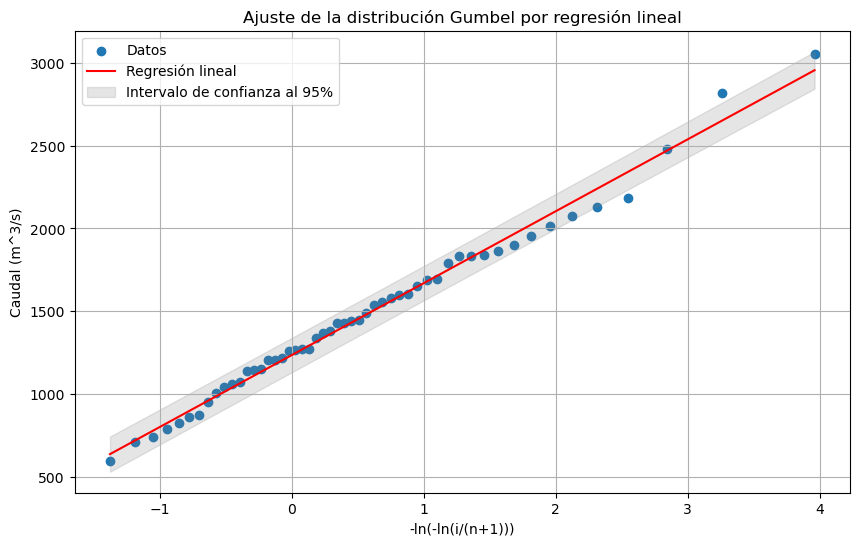

El caudal estimado para un periodo de retorno de 1000 años es: 4231.90 m^3/s


In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
años = np.arange(1950, 2002)
caudales = np.array([1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00, 1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00, 1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00, 1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00, 1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00, 1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00, 1698.00, 2076.00, 1204.00, 1835.00])

# Ordenar los datos de mayor a menor
caudales_ordenados = np.sort(caudales)

# Calcular el rango y el número de datos
rango = np.max(caudales_ordenados) - np.min(caudales_ordenados)
n = len(caudales_ordenados)

# Calcular las transformaciones adecuadas
i = np.arange(1, n+1)
transformada = -np.log(-np.log(i / (n + 1)))

# Ajustar la regresión lineal
regresion = stats.linregress(transformada, caudales_ordenados)

# Parámetros de la distribución Gumbel
mu = regresion.intercept
beta = -regresion.slope

# Calcular el caudal estimado para un periodo de retorno de 1000 años
periodo_retorno_deseado = 1000
probabilidad_excedencia_deseada = 1 - 1 / periodo_retorno_deseado
transformada_deseada = -np.log(-np.log(probabilidad_excedencia_deseada))
caudal_estimado = mu - beta * transformada_deseada

# Calcular los residuos y su desviación estándar
residuos = caudales_ordenados - (regresion.intercept + regresion.slope * transformada)
stderr = np.sqrt(np.sum(residuos**2) / (n - 2))

# Calcular los límites de confianza del 95% para cada punto
t = stats.t.ppf(0.975, n - 2)  # Valor crítico de t para un intervalo de confianza del 95%
limite_superior = np.empty(n)
limite_inferior = np.empty(n)
for j in range(n):
    limite_superior[j] = regresion.intercept + regresion.slope * transformada[j] + t * stderr * np.sqrt(1 + 1/n + (transformada[j] - np.mean(transformada))**2 / np.sum((transformada - np.mean(transformada))**2))
    limite_inferior[j] = regresion.intercept + regresion.slope * transformada[j] - t * stderr * np.sqrt(1 + 1/n + (transformada[j] - np.mean(transformada))**2 / np.sum((transformada - np.mean(transformada))**2))

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(transformada, caudales_ordenados, label='Datos')
plt.plot(transformada, regresion.intercept + regresion.slope * transformada, color='red', label='Regresión lineal')
plt.fill_between(transformada, limite_superior, limite_inferior, color='gray', alpha=0.2, label='Intervalo de confianza al 95%')
plt.xlabel('-ln(-ln(i/(n+1)))')
plt.ylabel('Caudal (m^3/s)')
plt.title('Ajuste de la distribución Gumbel por regresión lineal')
plt.legend()
plt.grid(True)
plt.show()

# Resultado del caudal estimado
print(f"El caudal estimado para un periodo de retorno de {periodo_retorno_deseado} años es: {caudal_estimado:.2f} m^3/s")





<font size="3" > 5. Determine los parámetros de la distribución Gumbel con el método de momentos. Estima la inundación de 1000 años y sus límites de confianza del 95%.

Parámetros de la distribución Gumbel: μ = 1475.0, β = 395.40060898222055
Caudal de 1000 años: 4206.132861280608
Límites de confianza del 95%: (3212.175732844361, 5200.089989716856)


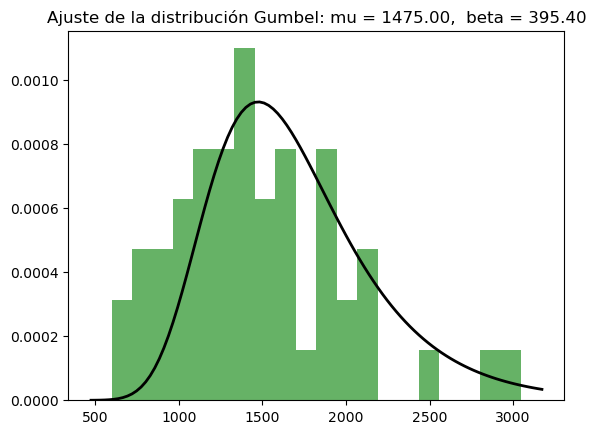

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Tus datos
data = [1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00, 1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00, 1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00, 1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00, 1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00, 1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00, 1698.00, 2076.00, 1204.00, 1835.00]

# Calcula la media y la desviación estándar
mean = np.mean(data)
std_dev = np.std(data)

# Calcula los parámetros de la distribución Gumbel
mu = mean
beta = std_dev * np.sqrt(6) / np.pi

# Estima el caudal de 1000 años
q_1000 = gumbel_r.ppf(1 - 1/1000, loc=mu, scale=beta)

# Calcula los límites de confianza del 95%
lower_limit = q_1000 - 1.96 * std_dev
upper_limit = q_1000 + 1.96 * std_dev

print(f'Parámetros de la distribución Gumbel: μ = {mu}, β = {beta}')
print(f'Caudal de 1000 años: {q_1000}')
print(f'Límites de confianza del 95%: ({lower_limit}, {upper_limit})')

# Crea un histograma de los datos
plt.hist(data, bins=20, density=True, alpha=0.6, color='g')

# Crea un rango de valores para el eje x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Crea la distribución Gumbel
p = gumbel_r.pdf(x, mu, beta)

# Dibuja la distribución Gumbel
plt.plot(x, p, 'k', linewidth=2)

title = "Ajuste de la distribución Gumbel: mu = %.2f,  beta = %.2f" % (mu, beta)
plt.title(title)

plt.show()


<font size="3" > 6. Estima la inundación de 1000 años asumiendo una distribución lognormal de los valores máximos.

El caudal estimado para un evento de 1000 años es: 4037.0331937199453 m3/s


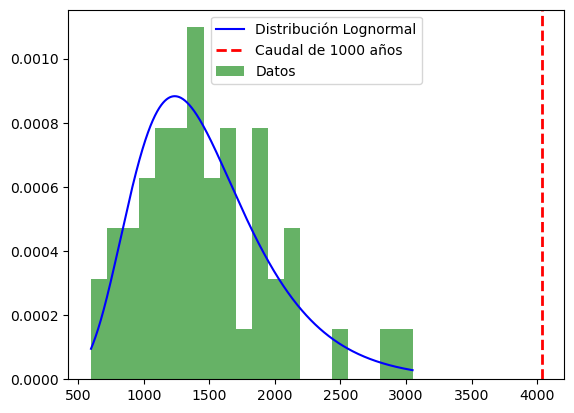

In [43]:
import numpy as np
import scipy.stats

# Tus datos de caudal
caudales = np.array([
    1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00,
    1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00,
    1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00,
    1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00,
    1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00,
    1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00,
    1698.00, 2076.00, 1204.00, 1835.00
])

# Transformación logarítmica
log_caudales = np.log(caudales)

# Cálculo de la media y la desviación estándar
media = np.mean(log_caudales)
desviacion = np.std(log_caudales)

# Estimación del caudal de 1000 años
caudal_1000 = np.exp(scipy.stats.norm.ppf(1-1/1000, loc=media, scale=desviacion))

print(f'El caudal estimado para un evento de 1000 años es: {caudal_1000} m3/s')

import matplotlib.pyplot as plt

# Generar una secuencia de números en la escala logarítmica que cubra el rango de los datos
x = np.linspace(min(log_caudales), max(log_caudales), 1000)

# Calcular la PDF de la distribución normal en la escala logarítmica
pdf = scipy.stats.norm.pdf(x, loc=media, scale=desviacion)

# Transformar los datos y la PDF de vuelta a la escala original
x = np.exp(x)
pdf = pdf / x

# Crear una nueva figura
plt.figure()

# Graficar los datos como un histograma y la PDF como una línea
plt.hist(caudales, bins=20, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, color='blue')

# Graficar la estimación del caudal de 1000 años
plt.axvline(caudal_1000, color='red', linestyle='dashed', linewidth=2)

# Añadir una leyenda
plt.legend(['Distribución Lognormal', 'Caudal de 1000 años', 'Datos'])

# Mostrar la gráfica
plt.show()



<font size="3" > 7. Prueba si los datos pueden considerarse como resultados de una distribución Gumbel.

In [44]:
import numpy as np
import scipy.stats as stats

# Tus datos de caudal
caudales = np.array([
    1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00,
    1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00,
    1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00,
    1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00,
    1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00,
    1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00,
    1698.00, 2076.00, 1204.00, 1835.00
])

# Parámetros de la distribución de Gumbel ajustados a los datos
params = stats.gumbel_r.fit(caudales)

# Realizar la prueba KS
D, p_value = stats.kstest(caudales, 'gumbel_r', args=params)

print(f'D-statistic: {D}')
print(f'p-value: {p_value}')


D-statistic: 0.05154735606685762
p-value: 0.9979408709437235


<font size="3" >8. Prueba si los datos pueden considerarse como resultados de una distribución lognormal. (en este ejercicio se han comparado los dos resultados referidos a la distribución Gumbel y log normal mediante la prueba Kolmogorov Smirnov)

In [45]:
import numpy as np
import scipy.stats as stats

# Tus datos de caudal
caudales = np.array([
    1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00,
    1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00,
    1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00,
    1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00,
    1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00,
    1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00,
    1698.00, 2076.00, 1204.00, 1835.00
])

# Transformación logarítmica
log_caudales = np.log(caudales)

# Parámetros de la distribución lognormal ajustados a los datos
s, loc, scale = stats.lognorm.fit(caudales, floc=0)

# Realizar la prueba KS
D, p_value = stats.kstest(log_caudales, 'lognorm', args=(s, loc, scale))

print(f'D-statistic: {D}')
print(f'p-value: {p_value}')


D-statistic: 1.0
p-value: 0.0


In [46]:
import numpy as np
import scipy.stats as stats

print("la prueba a aplicarse es la bondad y ajuste de Kolmogorov Smirnov")

# Tus datos de caudal
caudales = np.array([
    1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00,
    1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00,
    1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00,
    1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00,
    1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00,
    1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00,
    1698.00, 2076.00, 1204.00, 1835.00
])

# Transformación logarítmica
log_caudales = np.log(caudales)

# Parámetros de la distribución Gumbel ajustados a los datos
params_gumbel = stats.gumbel_r.fit(caudales)

# Parámetros de la distribución lognormal ajustados a los datos
params_lognorm = stats.lognorm.fit(caudales, floc=0)

# Realizar la prueba KS para la distribución Gumbel
D_gumbel, p_value_gumbel = stats.kstest(caudales, 'gumbel_r', args=params_gumbel)

# Realizar la prueba KS para la distribución lognormal
D_lognorm, p_value_lognorm = stats.kstest(log_caudales, 'lognorm', args=params_lognorm)

print(f'Gumbel: D-statistic = {D_gumbel}, p-value = {p_value_gumbel}')
print(f'Lognormal: D-statistic = {D_lognorm}, p-value = {p_value_lognorm}')

# Comparar los valores p para determinar cuál distribución es un mejor ajuste
if p_value_gumbel > p_value_lognorm:
    print('Los datos se ajustan mejor a una distribución Gumbel.')
else:
    print('Los datos se ajustan mejor a una distribución lognormal.')

print ("esta distribucion es mejor que la lognonormal para el conjunto de datos dado que el valor D es mas pequeño en la distribucion de Gumbel pareciendose mas la distribucion teorica a la de los datos")


la prueba a aplicarse es la bondad y ajuste de Kolmogorov Smirnov
Gumbel: D-statistic = 0.05154735606685762, p-value = 0.9979408709437235
Lognormal: D-statistic = 1.0, p-value = 0.0
Los datos se ajustan mejor a una distribución Gumbel.
esta distribucion es mejor que la lognonormal para el conjunto de datos dado que el valor D es mas pequeño en la distribucion de Gumbel pareciendose mas la distribucion teorica a la de los datos


<font size="3" >9. ¿Cuál es la probabilidad de que la inundación de 1000 años ocurra al menos una vez en los próximos 40
años?

In [47]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Tus datos de caudal
caudales = np.array([
    1266.00, 1492.00, 1862.00, 861.00, 715.00, 1367.00, 1837.00, 1429.00,
    1429.00, 1261.00, 1607.00, 2132.00, 1652.00, 1537.00, 1155.00, 1899.00,
    1956.00, 1596.00, 1380.00, 745.00, 2181.00, 955.00, 1007.00, 824.00,
    1271.00, 1044.00, 597.00, 1216.00, 1061.00, 1450.00, 2016.00, 1270.00,
    1341.00, 1075.00, 2482.00, 874.00, 1689.00, 1554.00, 1831.00, 1149.00,
    1444.00, 1791.00, 1207.00, 3050.00, 1578.00, 2817.00, 792.00, 1143.00,
    1698.00, 2076.00, 1204.00, 1835.00
])

# Transformación logarítmica
log_caudales = np.log(caudales)

# Parámetros de la distribución lognormal ajustados a los datos
s, loc, scale = stats.lognorm.fit(caudales, floc=0)

# Realizar la prueba KS
D_lognorm, p_value_lognorm = stats.kstest(log_caudales, 'lognorm', args=(s, loc, scale))

# Probabilidad de que el caudal de 1000 años NO ocurra en un año dado
prob_no_flood_one_year = 1 - 1/1000

# Probabilidad de que el caudal de 1000 años NO ocurra en los próximos 40 años
prob_no_flood_40_years = prob_no_flood_one_year ** 40

# Probabilidad de que el caudal de 1000 años ocurra AL MENOS UNA VEZ en los próximos 40 años
prob_at_least_one_flood = 1 - prob_no_flood_40_years

print(f'La probabilidad de que el caudal de 1000 años ocurra al menos una vez en los próximos 40 años es: {prob_at_least_one_flood}')




La probabilidad de que el caudal de 1000 años ocurra al menos una vez en los próximos 40 años es: 0.039229789264188186


<font size="3" >10. ¿Cuál es la probabilidad de que la inundación de 1000 años ocurra dos veces en los próximos 100 años?

In [48]:
import scipy.stats as stats

# Número de ensayos (años)
n = 100

# Número de éxitos (ocurrencias del caudal de 1000 años)
k = 2

# Probabilidad de éxito en un ensayo (probabilidad de que ocurra el caudal de 1000 años en un año dado)
p = 1/1000

# Calcular la probabilidad usando la distribución binomial
prob = stats.binom.pmf(k, n, p)

print(f'La probabilidad de que el caudal de 1000 años ocurra exactamente dos veces en los próximos 100 años es: {prob}')


La probabilidad de que el caudal de 1000 años ocurra exactamente dos veces en los próximos 100 años es: 0.004487692024569979
